In [42]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [43]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [44]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [48]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [49]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [50]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [51]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [52]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [53]:
# Find the most recent date in the data set.
from sqlalchemy import inspect

In [54]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [55]:
#Measurement table columns
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [56]:
#Station table columns
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


Latest date: ('2017-08-23',)
Date one year ago: 2016-08-23


<function matplotlib.pyplot.show(close=None, block=None)>

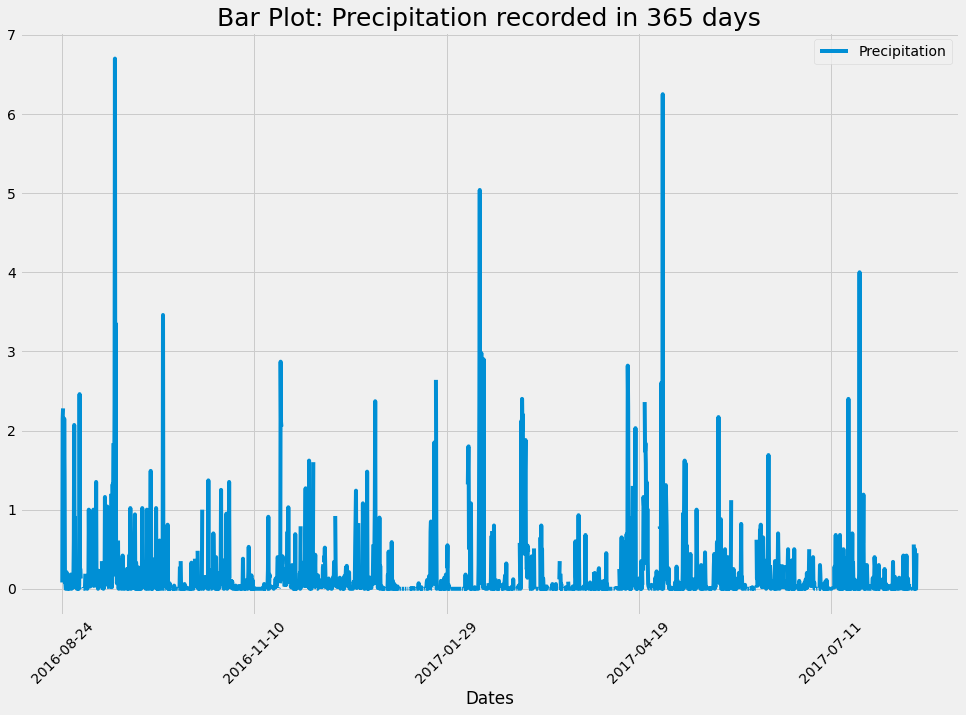

In [78]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
latest_dt = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Latest date:", latest_dt)

oneyear_ago = dt.date(2017, 8,  23) - dt.timedelta(days =365)
print("Date one year ago:", oneyear_ago)
# Perform a query to retrieve the data and precipitation scores

mea_pre = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date > oneyear_ago).\
    order_by(Measurement.date).all()
mea_pre
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(mea_pre, columns = ['Precipitation', 'Dates'] )
df.set_index('Dates')

# Sort the dataframe by date
df_date = df.sort_values(by = 'Dates')

# Use Pandas Plotting with Matplotlib to plot the data
df_date.plot( x = 'Dates', y = 'Precipitation', rot =45,figsize =(15,10) )
plt.title ("Bar Plot: Precipitation recorded in 365 days", size = 25)
plt.show


In [79]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_date.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [80]:
# Design a query to calculate the total number stations in the dataset
station_a = session.query(func.count(Station.station)).all()
station_a

[(9,)]

In [85]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_act_sta = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
                             order_by(func.count(Measurement.station).desc()).all()
most_act_sta

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [88]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
act_sta_temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                             func.avg(Measurement.tobs)).\
                             filter (Measurement.station == 'USC00519281').all()
print ("Min, Max and Avg temp for the most active station: " , act_sta_temp)
                             

Min, Max and Avg temp for the most active station:  [(54.0, 85.0, 71.66378066378067)]


In [99]:
# Using the most active station id
last_dt = session.query (Measurement.date).filter(Measurement.station == 'USC00519281').\
          order_by(Measurement.date.desc()).first()
print("Latest date for station 'USC00519281' is: " , last_dt )
yearago_again = dt.date (2017, 8, 18) - dt.timedelta(days =365)
print ("Date one year ago: ", yearago_again)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
his_result = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2017,8,23').all()
his_result


Latest date for station 'USC00519281' is:  ('2017-08-18',)
Date one year ago:  2016-08-18


[(72.0,),
 (70.0,),
 (64.0,),
 (63.0,),
 (63.0,),
 (62.0,),
 (70.0,),
 (70.0,),
 (62.0,),
 (62.0,),
 (63.0,),
 (65.0,),
 (69.0,),
 (77.0,),
 (70.0,),
 (74.0,),
 (69.0,),
 (72.0,),
 (71.0,),
 (69.0,),
 (71.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (69.0,),
 (70.0,),
 (66.0,),
 (65.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (59.0,),
 (60.0,),
 (70.0,),
 (73.0,),
 (75.0,),
 (64.0,),
 (59.0,),
 (59.0,),
 (62.0,),
 (68.0,),
 (70.0,),
 (73.0,),
 (79.0,),
 (75.0,),
 (65.0,),
 (70.0,),
 (74.0,),
 (70.0,),
 (70.0,),
 (71.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (61.0,),
 (67.0,),
 (65.0,),
 (72.0,),
 (71.0,),
 (73.0,),
 (72.0,),
 (77.0,),
 (73.0,),
 (67.0,),
 (62.0,),
 (64.0,),
 (67.0,),
 (66.0,),
 (81.0,),
 (69.0,),
 (66.0,),
 (67.0,),
 (69.0,),
 (66.0,),
 (68.0,),
 (65.0,),
 (74.0,),
 (69.0,),
 (72.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (74.0,),
 (68.0,),
 (73.0,),
 (71.0,),
 (74.0,),
 (75.0,),
 (70.0,),
 (67.0,),
 (71.0,),
 (67.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (67.0,),


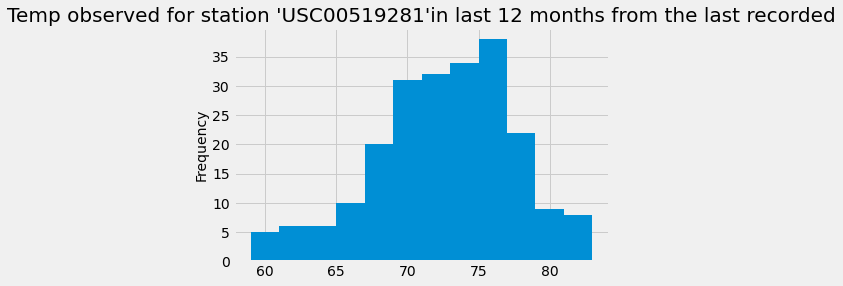

In [101]:
df_histo = pd.DataFrame(his_result, columns = ['Tobs'])
df_histo.hist (bins = 12)

plt.ylabel("Frequency", fontsize = 14)
plt.title("Temp observed for station 'USC00519281'in last 12 months from the last recorded", size = 20)
lables = ["Tobs"]


plt.show()


# Close session

In [102]:
# Close Session
session.close()